# Project 2
### Group 3: Francisco Belliard, Arturo Fillo Villa, Christian Allen

### Import python modules

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets as sk
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score;
from sklearn.preprocessing import normalize as nm
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

### Read in, store, and clean datasets

In [53]:
# Library specfic options 

############## Pandas #####################
# show all rows in pandas data frames
# pd.set_option('display.max_rows', None)

### Dataset 1

In [54]:
#  ################# Dataset 1 ########################
#
#  UNCOMMENT BELOW TO USE

# # load breast cancer data (same from UCI repo)
# table = sk.load_breast_cancer() 

# #store attribute vectors (without class label)
# X = table.data

# #store class labels
# labels = table.target

# #convert to dataframe
# df = pd.DataFrame(table.data,columns=table.feature_names)

# #column names
# colnames = table.feature_names
# # print(colnames)

# #append class label to dataframe
# df['class'] = labels

# df

### Dataset 2

In [58]:
# ################# Dataset 2 ########################
# Haberman Survial Dataset
#  The dataset contains cases from a study that was conducted between
#   1958 and 1970 at the University of Chicago's Billings Hospital on
#   the survival of patients who had undergone surgery for breast
#   cancer.
#   UNCOMMENT BELOW TO USE
# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data"

# # read in data into dataframe
# df = pd.read_csv(url)

# # rename columns to match dataset
# df = df.rename(columns={'30':'age', '64':'year of op', '1':'positive axillary nodes', '1.1':'class'})
# colnames = df.columns[:-1].values
# print(colnames)

# # store class labels
# tmplabels = df['class']
# labels =[]
# for item in tmplabels:
#     labels.append(item-1)

# # print(labels)

# X = df[['age', 'year of op', 'positive axillary nodes']]
# df


['age' 'year of op' 'positive axillary nodes']


,age,year of op,positive axillary nodes,class
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


### Dataset 3

['sepal length' 'sepal width' 'petal length' 'petal width']


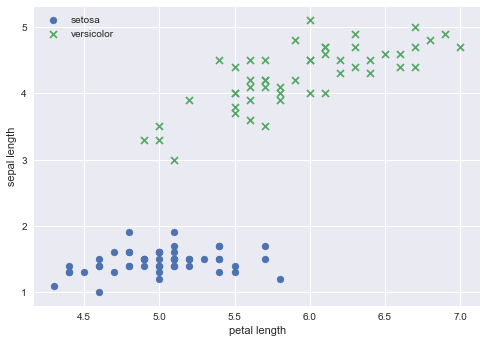

In [91]:
#  ################# Dataset 3 (balanced dataset) ########################
# Iris dataset
#   This is perhaps the best known database to be found in the pattern recognition literature. 
#   Fisher's paper is a classic in the field and is referenced frequently to this day.
#   The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. 
#   One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.
#   Predicted attribute: class of iris plant.
#   UNCOMMENT BELOW TO USE

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

df = pd.read_csv(url,header=None)
# print(df)
df = df.rename(columns={0:'sepal length', 1:'sepal width', 2:'petal length', 3:'petal width', 4:'class'})
df = df.iloc[:100,]
# print(df)
labels = df['class']
labels = np.where(df.iloc[:, -1]=='Iris-setosa', 0, 1)
# print(labels)

colnames = df.columns[:-1].values
print(colnames)

X = df.iloc[:100,0:-1]
# print(X)
# print(X,labels)

#Uncomment to show graph of linearly separability
X = np.asmatrix(X,dtype='float64')
plt.scatter(np.array(X[:50,0]), np.array(X[:50,2]), marker='o', label='setosa')
plt.scatter(np.array(X[50:,0]), np.array(X[50:,2]), marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend()
plt.show()

In [92]:
#  ################# Simulated Dataset (Non linearly separable) ########################
#   Generated dataset to show nonlinear separability
#   UNCOMMENT BELOW TO USE

# x_center = 5
# y_center = 5
# num_samples = 150
# S1 = np.random.normal(size = (num_samples, 2))
# S4 = np.array([[x_center,y_center]], dtype=np.float32)+np.random.normal(size =(num_samples, 2))
# #Points for C1
# S2 = np.array([[0,y_center]], dtype=np.float32)+np.random.normal(size =(num_samples, 2))
# S3 = np.array([[x_center,0]], dtype=np.float32)+np.random.normal(size =(num_samples, 2))


# #construct label vectors (C0 = 0, C1 = 1)
# labels1 = np.zeros(num_samples*2)
# labels2 = np.ones(num_samples*2)
# #associate samples and lables
# C0=np.concatenate((S1,S4),axis = 0)
# C1=np.concatenate((S2,S3),axis = 0)
# S = np.concatenate((C0,C1),axis = 0)
# labels = np.concatenate((labels1,labels2), axis = 0)
# colors=[]
# for value in labels:
#     if value==0:
#         colors.append('red')
#     else:
#         colors.append('blue')
# Better Label Stuff 
# x=S[:,0]
# y=S[:,1]
# #Plot all data points
# # plt.style.use("seaborn")
# plt.scatter(x,y, c = colors )
# plt.title('Full data set')
# # plt.colorbar(cmap='rwb')
# plt.show()




### Show dataset info

In [93]:
#show number of each class
print(df['class'].value_counts())

Iris-versicolor    50
Iris-setosa        50
Name: class, dtype: int64


### Oversampling and Undersampling Libraries

In [94]:
########### Oversampling ##########
# UNCOMMENT TO USE
# sm = SMOTE()
# X_res, labels_res = sm.fit_sample(X, labels)
# X = X_res
# labels = labels_res
# print('Resampled dataset shape {}'.format(Counter(labels)))

######## Undersample #############
# UNCOMMENT TO USE
# rus = RandomUnderSampler()
# X_res, labels_res = rus.fit_sample(X, labels) 
# X = X_res
# labels = labels_res
# print('Resampled dataset shape {}'.format(Counter(labels)))

Resampled dataset shape Counter({0: 50, 1: 50})


### Set Number of Epochs

In [95]:
# adjust to change epoch
epoch = 100

### Preprocess datasets
#### Shuffle and split data into training and testing set

In [96]:
#70-30 split
trainSet, testSet, trainLabel, testLabel = train_test_split(X,labels,test_size=0.3, shuffle=True,)
# trainSet, testSet, trainLabel, testLabel = train_test_split(X_res,labels_res,test_size=0.3, shuffle=True,)

trainDF = pd.DataFrame(trainSet)
testDF = pd.DataFrame(testSet)
# print(trainDF)
# print(testDF)
trainLabelDF = pd.DataFrame(trainLabel)
testLabelDF = pd.DataFrame(testLabel)
normTrain = nm(trainDF)
normTest = nm(testDF)
# print(trainLabel)
# print(testLabel)
# normTrain = pd.DataFrame(normTrain)
# normTest = pd.DataFrame(normTest)

### Implement PLA on data
#### Test 1: Learning Rate = 0.3


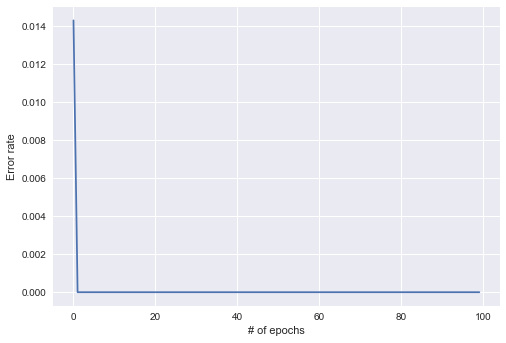

Max Accuracy, At Epoch #
1.0 1


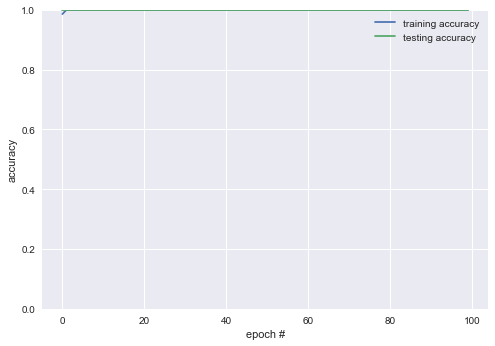

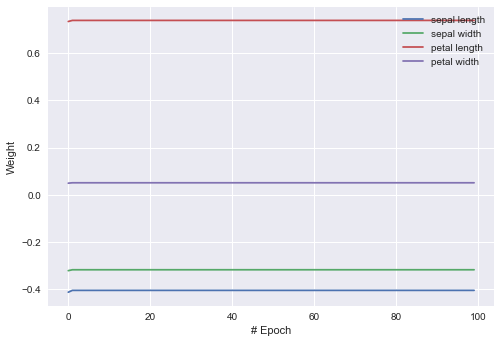

In [97]:
from percep import Perceptron
ptron = Perceptron()
lr = 0.3
wt_matrix = ptron.fit(normTrain,trainLabel,normTest,testLabel,epoch,lrate)
wt_matrix = pd.DataFrame(wt_matrix,columns=colnames)

# print(colnames)

plt.plot(wt_matrix)
plt.xlabel('# Epoch')
plt.ylabel('Weight')
plt.legend(colnames)
plt.show()

### Predict using test data

In [98]:
predTest = ptron.predict(normTrain)
print(accuracy_score(trainLabel,predTest))

1.0


#### Test 2: Learning Rate = 0.5

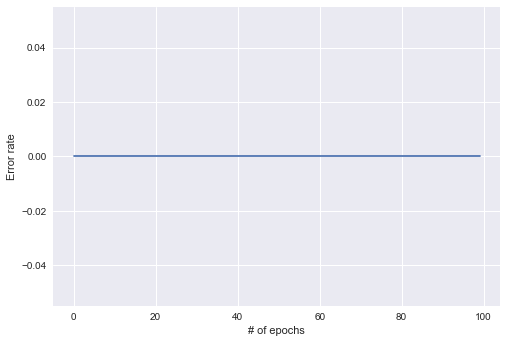

Max Accuracy, At Epoch #
1.0 0


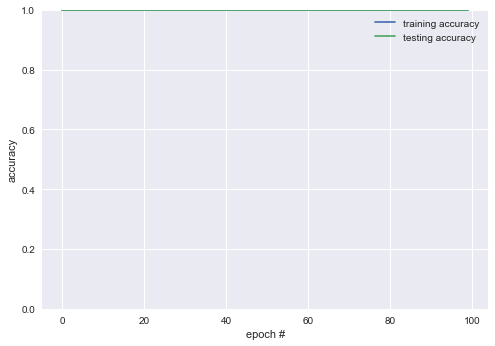

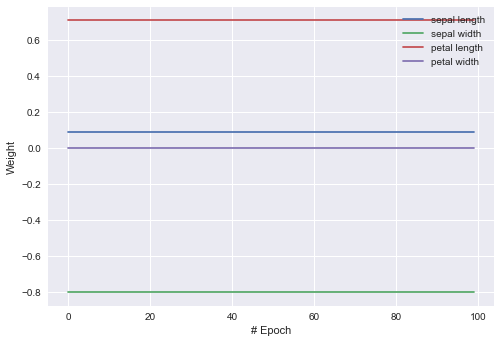

In [99]:
# ptron = Perceptron()
lrate = 0.5
wt_matrix = ptron.fit(normTrain,trainLabel,normTest,testLabel,epoch,lrate)
wt_matrix = pd.DataFrame(wt_matrix,columns=colnames)

# print(colnames)

plt.plot(wt_matrix)
plt.xlabel('# Epoch')
plt.ylabel('Weight')
plt.legend(colnames)
plt.show()

### Predict using test data

In [100]:
predTest = ptron.predict(normTrain)
print(accuracy_score(trainLabel,predTest))

1.0


#### Test 3: Learning Rate = 0.01

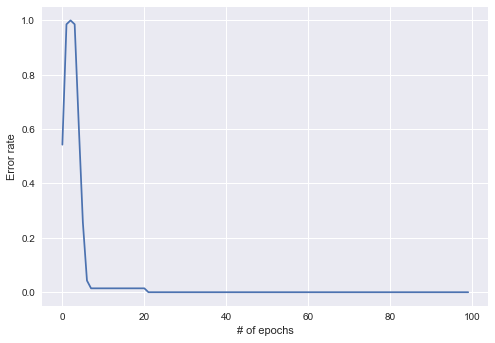

Max Accuracy, At Epoch #
1.0 21


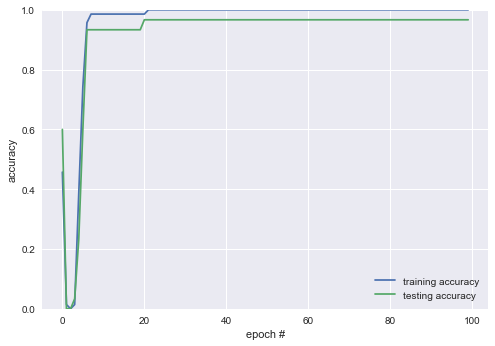

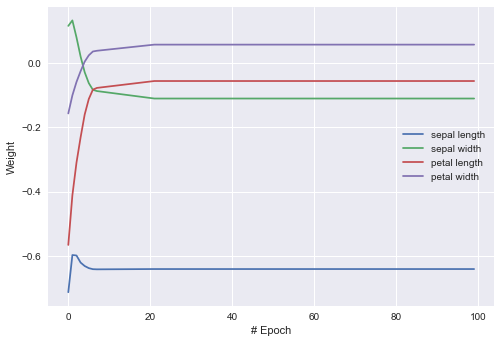

In [101]:
lrate = 0.01
wt_matrix = ptron.fit(normTrain,trainLabel,normTest,testLabel,epoch,lrate)
wt_matrix = pd.DataFrame(wt_matrix,columns=colnames)

# print(colnames)

plt.plot(wt_matrix)
plt.xlabel('# Epoch')
plt.ylabel('Weight')
plt.legend(colnames)
plt.show()

In [169]:
# wt_matrix = ptron.fit(normTrain,trainLabel,100,0.5)
# print(wt_matrix.shape)
# plt.scatter(wt_matrix[:,0],wt_matrix[:,1])
# plt.show()


# # X - some data in 2dimensional np.array

# x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
# y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
#                      np.arange(y_min, y_max, h))

# # here "model" is your model's prediction (classification) function
# Z = model(np.c_[xx.ravel(), yy.ravel()]) 

# # Put the result into a color plot
# Z = Z.reshape(xx.shape)
# plt.contourf(xx, yy, Z, cmap=pl.cm.Paired)
# plt.axis('off')

# # Plot also the training points
# plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=pl.cm.Paired)

### Make it pretty

In [135]:
# %matplotlib inline
# from matplotlib import animation, rc
# from IPython.display import HTML

# fig, ax = plt.subplots()

# ax.set_xlim(( 0, wt_matrix.shape[1]))
# ax.set_ylim((-15000, 25000))

# line, = ax.plot([], [], lw=2)

# # animation function.
# def animate(i):
#     x = list(range(wt_matrix.shape[1]))
#     y = wt_matrix[i, :]
#     line.set_data(x, y)
#     return (line,)

In [136]:
# call the animator. blit=True means only re-draw the parts that have changed.
# anim = animation.FuncAnimation(fig, animate, frames=100, interval=200, blit=True)

In [137]:
# print(animation.writers.list())


In [138]:
# anim.save('animation.gif', writer='pillow', fps=50)


In [139]:
# HTML(anim.to_jshtml())
